In [1]:
import pandas as pd
import matplotlib.pyplot as plt


In [2]:
df = pd.read_csv("unemployment.csv", sep=None, engine="python")


In [3]:
print(df.shape)
print(df.columns)
df.head()


(267, 11)
Index(['Region', 'Date', 'Frequency', 'Estimated Unemployment Rate (%)',
       'Estimated Employed', 'Estimated Labour Participation Rate (%)',
       'Region.1', 'longitude', 'latitude', 'Unnamed: 9', 'Unnamed: 10'],
      dtype='object')


,Region,Date,Frequency,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),Region.1,longitude,latitude,Unnamed: 9,Unnamed: 10
0,Andhra Pradesh,31-01-2020,M,5.48,16635535,41.02,South,15.9129,79.74,NaN,NaN
1,Andhra Pradesh,29-02-2020,M,5.83,16545652,40.90,South,15.9129,79.74,NaN,NaN
2,Andhra Pradesh,31-03-2020,M,5.79,15881197,39.18,South,15.9129,79.74,NaN,NaN
3,Andhra Pradesh,30-04-2020,M,20.51,11336911,33.10,South,15.9129,79.74,NaN,NaN
4,Andhra Pradesh,31-05-2020,M,17.43,12988845,36.46,South,15.9129,79.74,NaN,NaN


In [4]:
df = df.loc[:, ~df.columns.duplicated()]


In [5]:
df['Date'] = pd.to_datetime(df['Date'], dayfirst=True, errors='coerce')
df = df.dropna(subset=['Date'])


In [6]:
num_cols = [
    'Estimated Unemployment Rate (%)',
    'Estimated Employed',
    'Estimated Labour Participation Rate (%)'
]

for col in num_cols:
    df[col] = pd.to_numeric(df[col], errors='coerce')


In [7]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 267 entries, 0 to 266
Data columns (total 11 columns):
 #   Column                                   Non-Null Count  Dtype         
---  ------                                   --------------  -----         
 0   Region                                   267 non-null    object        
 1   Date                                     267 non-null    datetime64[ns]
 2   Frequency                                267 non-null    object        
 3   Estimated Unemployment Rate (%)          267 non-null    float64       
 4   Estimated Employed                       267 non-null    int64         
 5   Estimated Labour Participation Rate (%)  267 non-null    float64       
 6   Region.1                                 267 non-null    object        
 7   longitude                                267 non-null    float64       
 8   latitude                                 267 non-null    object        
 9   Unnamed: 9                               0 

In [8]:
df['Covid'] = df['Date'].dt.year == 2020


In [9]:
df.groupby('Covid')['Estimated Unemployment Rate (%)'].mean()


Covid
True    12.236929
Name: Estimated Unemployment Rate (%), dtype: float64

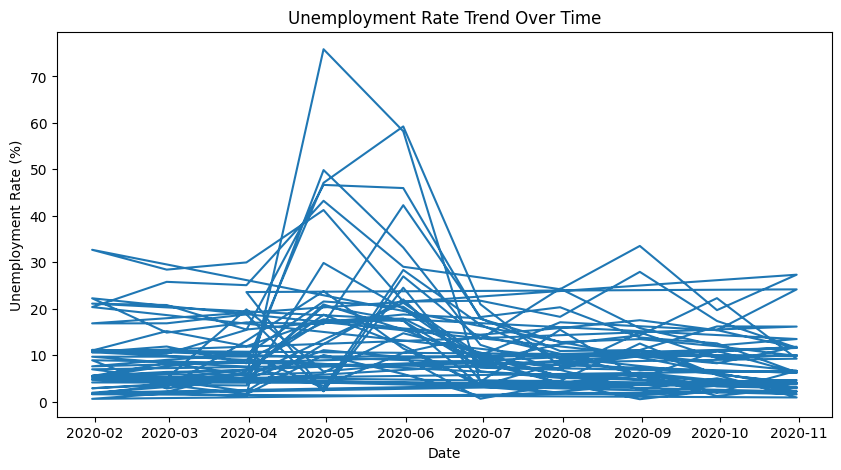

In [10]:
plt.figure(figsize=(10,5))
plt.plot(df['Date'], df['Estimated Unemployment Rate (%)'])
plt.title("Unemployment Rate Trend Over Time")
plt.xlabel("Date")
plt.ylabel("Unemployment Rate (%)")
plt.show()


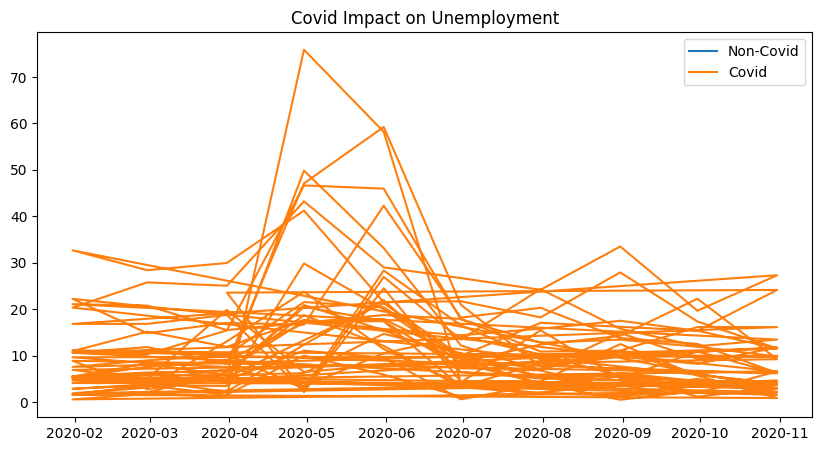

In [11]:
covid = df[df['Covid']]
non_covid = df[~df['Covid']]

plt.figure(figsize=(10,5))
plt.plot(non_covid['Date'], non_covid['Estimated Unemployment Rate (%)'], label='Non-Covid')
plt.plot(covid['Date'], covid['Estimated Unemployment Rate (%)'], label='Covid')
plt.legend()
plt.title("Covid Impact on Unemployment")
plt.show()


In [12]:
state_avg = df.groupby('Region')['Estimated Unemployment Rate (%)'].mean().sort_values(ascending=False)
state_avg.head(10)


Region
Haryana             27.477000
Tripura             25.055000
Jharkhand           19.539000
Bihar               19.471000
Delhi               18.414000
Puducherry          17.942000
Jammu & Kashmir     16.477778
Himachal Pradesh    16.065000
Rajasthan           15.868000
Tamil Nadu          12.187000
Name: Estimated Unemployment Rate (%), dtype: float64

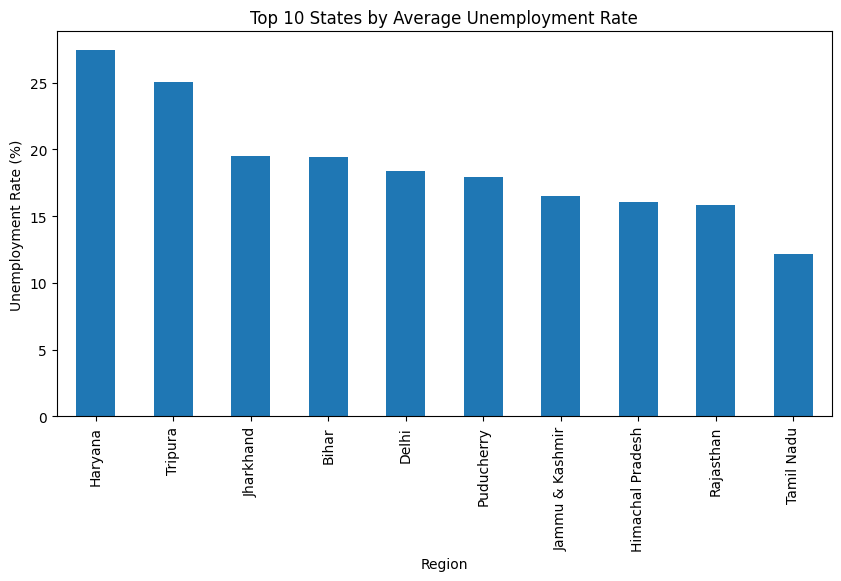

In [13]:
state_avg.head(10).plot(kind='bar', figsize=(10,5))
plt.title("Top 10 States by Average Unemployment Rate")
plt.ylabel("Unemployment Rate (%)")
plt.show()


In [14]:
print("FINAL INSIGHTS")
print("1. Unemployment spiked sharply during Covid-19 (2020).")
print("2. Labour participation declined during lockdown periods.")
print("3. Large variation exists between states.")
print("4. Policy intervention is crucial during economic shocks.")


FINAL INSIGHTS
1. Unemployment spiked sharply during Covid-19 (2020).
2. Labour participation declined during lockdown periods.
3. Large variation exists between states.
4. Policy intervention is crucial during economic shocks.
